In [1]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.9 MB/s eta 0:00:00


In [2]:
from glob import glob
from sklearn.model_selection import GroupKFold, StratifiedKFold
import cv2
from skimage import io
import os
from datetime import datetime
import time
import random
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
from IPython.display import display
import matplotlib.pyplot as plt
import sklearn
import warnings
import joblib
from sklearn.metrics import roc_auc_score, log_loss
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings; warnings.filterwarnings('ignore')
import cv2
import pydicom
#from efficientnet_pytorch import EfficientNet
from scipy.ndimage.interpolation import zoom

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score

from pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [5]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [6]:
!gdown --id 1diztKyKFfhINpY-8R_KB84kV8akW2NjD

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1diztKyKFfhINpY-8R_KB84kV8akW2NjD
To: /content/test_train_val.zip
100% 480M/480M [00:09<00:00, 48.7MB/s]


In [4]:
!unzip -qq test_train_val.zip

unzip:  cannot find or open test_train_val.zip, test_train_val.zip.zip or test_train_val.zip.ZIP.


In [ ]:
with open('test_train_val/train_meta.csv') as f:
  train_df= pd.read_csv(f)
with open('test_train_val/train_signal.csv') as f:
  train_signal = pd.read_csv(f)

with open('test_train_val/valid_meta.csv') as f:
  valid_df= pd.read_csv(f)
with open('test_train_val/valid_signal.csv') as f:
  valid_signal = pd.read_csv(f)

with open('test_train_val/test_meta.csv') as f:
  test_df= pd.read_csv(f)
with open('test_train_val/test_signal.csv') as f:
  test_signal = pd.read_csv(f)

print(train_df.shape)

train_df

(17441, 37)


,ecg_id,age,sex,height,weight,nurse,site,device,NORM,MI,...,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI,strat_fold
0,1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,...,0,0,0,0,0,0,0,0,0,2
2,3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,...,0,0,0,0,0,0,0,0,0,5
3,4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17436,21832,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,...,0,0,0,0,0,0,0,0,0,7
17437,21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,...,0,0,0,0,0,0,0,0,0,7
17438,21834,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,...,0,0,0,0,0,0,0,0,0,4
17439,21835,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
# train_df=pd.read_csv("C:/Users/Abdulhaq/Documents/test_train_val/test_train_val/train_meta.csv")
# train_signal=pd.read_csv("C:/Users/Abdulhaq/Documents/test_train_val/test_train_val/train_signal.csv")


# valid_df=pd.read_csv("C:/Users/Abdulhaq/Documents/test_train_val/test_train_val/valid_meta.csv")
# valid_signal=pd.read_csv("C:/Users/Abdulhaq/Documents/test_train_val/test_train_val/valid_signal.csv")


# test_df=pd.read_csv("C:/Users/Abdulhaq/Documents/test_train_val/test_train_val/test_meta.csv")
# test_signal=pd.read_csv("C:/Users/Abdulhaq/Documents/test_train_val/test_train_val/test_signal.csv")


# print(train_df.shape)

# train_df

In [ ]:
class PTBXLDatasetPreprocesser():
    def __init__(self):
        pass
    
    def save(self, filename):
        data = {
            'superclass_cols': self.superclass_cols,
            'subclass_cols': self.subclass_cols,
            'meta_num_cols': self.meta_num_cols,
            'meta_num_means': self.meta_num_means,
            'min_max_scaler': self.min_max_scaler,
            'meta_cat_cols': self.meta_cat_cols,
            'cat_lablers': self.cat_lablers,
            'bclass_cols': self.bclass_cols,
            
        }
        pd.to_pickle(data, filename)
        
    def load(self, filename):
        data = pd.read_pickle(filename)
        self.min_max_scaler = data['min_max_scaler']
        self.cat_lablers = data['cat_lablers']
        #self.binary_lablers = data['binary_lablers']
        
    def fit(self, x, y):
        x = x.copy()
        y = y.copy()
        
        self.superclass_cols = [ 'MI', 'STTC', 'CD', 'HYP']
        
        self.subclass_cols = [col for col in y.columns if 'sub_' in col]

        self.bclass_cols = ['NORM']
        
        self.meta_num_cols = ['age', 'height', 'weight']
        self.meta_num_means = []
        for col in self.meta_num_cols:
            print(col, y[col].mean())
            y[col] = y[col].fillna(y[col].mean())
            self.meta_num_means += [y[col].mean()]
            
        self.min_max_scaler = MinMaxScaler().fit(y[self.meta_num_cols])
        
        self.meta_cat_cols = ['sex'] #, 'nurse', 'device']
        self.cat_lablers = [LabelEncoder().fit(y[col].fillna('none').astype(str)) for col in self.meta_cat_cols]
        return self

        #self.min_max_scaler = MinMaxScaler().fit(y[self.meta_num_cols])
        
        #self.meta_binary_cols = ['NORM'] 
        #self.binary_lablers = [LabelEncoder().fit(y[col].fillna('none').astype(str)) for col in self.meta_binary_cols]
        #return self
    
    def transform(self, x, y):
        
        channel_cols = x.columns.tolist()[1:]
        
        ret = []
        x = x[channel_cols].values.reshape(-1, 1000, 12)
        print(x.shape)
        ret += [x] # signal
        
        y_ = y.copy()
        
        for i, col in enumerate(self.meta_num_cols):
            y_[col] = y_[col].fillna(self.meta_num_means[i])
        y_[self.meta_num_cols] = self.min_max_scaler.transform(y_[self.meta_num_cols])
        y_[self.meta_num_cols] = np.clip(y_[self.meta_num_cols], 0., 1.) # prevent extreme value far from train set
        
        ret += [y_[self.meta_num_cols]] # meta num features
        
        for i, col in enumerate(self.meta_cat_cols):
            y_[col] = y_[col].fillna('none').astype(str)
            y_[col] = self.cat_lablers[i].transform(y_[col]) 
        
        ret += [y_[self.meta_cat_cols]] # meta cat features

        #for i, col in enumerate(self.meta_binary_cols):
           # y_[col] = y_[col].fillna('none').astype(str)
           # y_[col] = self.binary_lablers[i].transform(y_[col]) 
        
        #ret += [y_[self.meta_binary_cols]] # binary class target
        
        if np.isin(self.superclass_cols, y.columns).sum() == len(self.superclass_cols):
            ret += [y[self.superclass_cols].fillna(0).astype(int)] # superclass targets
        
        if np.isin(self.subclass_cols, y.columns).sum() == len(self.subclass_cols):
            ret += [y[self.subclass_cols].fillna(0).astype(int)] # subclass targets

        if np.isin(self.bclass_cols, y.columns).sum() == len(self.bclass_cols):
            ret += [y[self.bclass_cols].fillna(0).astype(int)]
        
        return ret

In [ ]:
data_preprocessor = PTBXLDatasetPreprocesser()
data_preprocessor.fit(train_signal, train_df)
train_signal, train_meta_num_feats, train_meta_cat_feats, train_superclass, train_subclass, train_bclass = data_preprocessor.transform(train_signal, train_df)
valid_signal, valid_meta_num_feats, valid_meta_cat_feats, valid_superclass, valid_subclass, valid_bclass = data_preprocessor.transform(valid_signal, valid_df)
test_signal, test_meta_num_feats, test_meta_cat_feats, test_superclass, test_subclass, test_bclass = data_preprocessor.transform(test_signal, test_df)

print(train_signal.shape)
print(valid_meta_num_feats.isna().sum(), valid_meta_cat_feats.isna().sum(), valid_superclass.isna().sum(), valid_subclass.isna().sum(), valid_bclass.isna().sum())

display(train_meta_num_feats)
display(train_meta_cat_feats)
display(train_superclass)
display(train_subclass)
display(train_bclass)

age 59.63709074169975
height 166.68908469699693
weight 70.69599447513812
(17441, 1000, 12)
(2193, 1000, 12)
(2203, 1000, 12)
(17441, 1000, 12)
age       0
height    0
weight    0
dtype: int64 sex    0
dtype: int64 MI      0
STTC    0
CD      0
HYP     0
dtype: int64 sub_NORM         0
sub_IMI          0
sub_STTC         0
sub_NST_         0
sub_LVH          0
sub_LAFB/LPFB    0
sub_RVH          0
sub_RAO/RAE      0
sub_IRBBB        0
sub_IVCD         0
sub_LMI          0
sub_AMI          0
sub__AVB         0
sub_ISCA         0
sub_ISC_         0
sub_SEHYP        0
sub_ISCI         0
sub_CRBBB        0
sub_CLBBB        0
sub_LAO/LAE      0
sub_ILBBB        0
sub_WPW          0
sub_PMI          0
dtype: int64 NORM    0
dtype: int64


,age,height,weight
0,0.580645,0.791572,0.282927
1,0.182796,0.791572,0.317073
2,0.376344,0.791572,0.312195
3,0.236559,0.791572,0.375610
4,0.182796,0.791572,0.317073
...,...,...,...
17436,0.655914,0.791572,0.320468
17437,0.698925,0.791572,0.320468
17438,0.978495,0.791572,0.320468
17439,0.612903,0.791572,0.320468


,sex
0,1
1,0
2,1
3,0
4,1
...,...
17436,0
17437,1
17438,0
17439,1


,MI,STTC,CD,HYP
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
17436,0,0,1,0
17437,0,1,0,0
17438,0,0,0,0
17439,0,1,0,0


,sub_NORM,sub_IMI,sub_STTC,sub_NST_,sub_LVH,sub_LAFB/LPFB,sub_RVH,sub_RAO/RAE,sub_IRBBB,sub_IVCD,...,sub_ISCA,sub_ISC_,sub_SEHYP,sub_ISCI,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_WPW,sub_PMI
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17436,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17437,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17438,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17439,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


,NORM
0,1
1,1
2,1
3,1
4,1
...,...
17436,0
17437,0
17438,1
17439,0


In [ ]:
#new_df= np.hstack((train_meta_num_feats, train_meta_cat_feats))
#new_df.shape
#new_df

In [ ]:
signal=np.array(train_signal)
signal.shape
#print(signal)

(17441, 1000, 12)

In [ ]:
print(signal)

[[[-1.190e-01 -5.500e-02  6.400e-02 ... -2.600e-02 -3.900e-02 -7.900e-02]
  [-1.160e-01 -5.100e-02  6.500e-02 ... -3.100e-02 -3.400e-02 -7.400e-02]
  [-1.200e-01 -4.400e-02  7.600e-02 ... -2.800e-02 -2.900e-02 -6.900e-02]
  ...
  [ 6.900e-02  0.000e+00 -6.900e-02 ...  2.400e-02 -4.100e-02 -5.800e-02]
  [ 8.600e-02  4.000e-03 -8.100e-02 ...  2.420e-01 -4.600e-02 -9.800e-02]
  [ 2.200e-02 -3.100e-02 -5.400e-02 ...  1.430e-01 -3.500e-02 -1.200e-01]]

 [[ 4.000e-03  1.380e-01  1.340e-01 ...  1.920e-01  8.300e-02  8.800e-02]
  [-2.000e-02  1.160e-01  1.360e-01 ...  1.560e-01  5.700e-02  6.300e-02]
  [-5.300e-02  9.200e-02  1.450e-01 ...  1.070e-01  1.300e-02  2.200e-02]
  ...
  [ 1.210e-01  3.980e-01  2.770e-01 ... -1.065e+00 -4.920e-01 -1.560e-01]
  [-3.260e-01  5.700e-02  3.830e-01 ... -2.800e-01 -1.750e-01 -7.100e-02]
  [-3.480e-01 -5.600e-02  2.920e-01 ... -3.080e-01 -2.310e-01 -1.450e-01]]

 [[-2.900e-02 -7.900e-02 -4.900e-02 ... -1.030e-01 -7.600e-02 -6.600e-02]
  [-3.500e-02 -7.000e-

In [ ]:
# print(signal)

In [ ]:
target=np.array(train_bclass)
target.shape

(17441, 1)

In [ ]:
v_signal=np.array(valid_signal)

In [ ]:
v_signal.shape

(2193, 1000, 12)

In [ ]:
#newv_signal=v_signal.reshape(2193,10,100,12)

In [ ]:
v_target=np.array(valid_bclass)
v_target.shape

(2193, 1)

In [ ]:
t_signal=np.array(test_signal)

In [ ]:
t_target=np.array(test_bclass)

In [ ]:
full_signal= np.vstack((signal,v_signal,t_signal))
full_signal.shape

(21837, 1000, 12)

In [ ]:
full_target= np.vstack((target,v_target,t_target))
full_target.shape

(21837, 1)

In [ ]:
!pip install ecg-plot
#import physionet_challenge_utility_script as pc
import ecg_plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
#from keras.utils import plot_model
#from keras.preprocessing.sequence import pad_sequences
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPool1D, ZeroPadding1D, LSTM, Bidirectional, ConvLSTM1D
from keras.models import Sequential, Model
#from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, auc, precision_score, recall_score, f1_score

from keras.layers import concatenate
from scipy import optimize
from scipy.io import loadmat
import os
%load_ext autoreload
%autoreload
%reload_ext autoreload

N
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=12)

In [ ]:
# vot = []

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(full_signal, full_target, test_size=0.15, random_state=25)

In [ ]:
print("train signal shape", X_train.shape,"train target shape",Y_train.shape)
print("test signal shape", X_test.shape,"test target shape",Y_test.shape)

train signal shape (18561, 1000, 12) train target shape (18561, 1)
test signal shape (3276, 1000, 12) test target shape (3276, 1)


**Binary Classification on ECG ataset**

**ANN MODEL**

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(50, activation='relu', input_shape=(1000,12)))
ann_model.add(Dense(50, activation='relu'))
ann_model.add(Dense(50, activation='relu'))
ann_model.add(Dense(50, activation='relu'))
ann_model.add(GlobalAveragePooling1D())
ann_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# ann_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.BinaryAccuracy(
#         name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
#                     tf.keras.metrics.AUC(
#         num_thresholds=200,
#         curve="ROC",
#         summation_method="interpolation",
#         name="AUC",
#         dtype=None,
#         thresholds=None,
#         multi_label=True,
#         label_weights=None,
#     )])

In [ ]:
ann_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy','AUC'])

In [ ]:
# ann_model.summary()

In [ ]:
# plot_model(ann_model)

In [ ]:
from sklearn.model_selection import KFold
n_folds=2
batchsize = 32
kfold = KFold(n_splits=n_folds, shuffle=True)
model_history = [] 

fold_no = 1
for train, test in kfold.split(X_train, Y_train):
  print("Training on Fold: ",fold_no)
  results = ann_model.fit(X_train, Y_train, batch_size=batchsize, epochs=30, verbose='auto', callbacks=[reduce_lr,early_stop], validation_split=0.15)
  score = ann_model.evaluate(X_test, Y_test, verbose=0)
  print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

  y_pred1=ann_model.predict(X_test)
  predict1=[int(x+0.5) for x in y_pred1]
  conf_mat = confusion_matrix(Y_test, predict1)
  print(conf_mat)
  
  # acc_score=accuracy_score(Y_test,y_pred1)
  prec_score = precision_score(Y_test, predict1)
  rec_score = recall_score(Y_test, predict1)
  f_score = f1_score(Y_test, predict1)
  print("Precision(test)= ", prec_score, " Recall(test)= ", rec_score, " F1 Score(test)= ", f_score)
  fpr, tpr, thresholds = metrics.roc_curve(Y_test,y_pred1)
  print("AUC(test)= ",metrics.auc(fpr, tpr))
  
  fold_no = fold_no + 1
  
  model_history.append(results)

Training on Fold:  1
Epoch 1/30
371/371 [==============================] - 4s 10ms/step - loss: 0.3817 - accuracy: 0.8249 - auc: 0.9056 - val_loss: 0.3912 - val_accuracy: 0.8223 - val_auc: 0.9099 - lr: 0.0010
Epoch 2/30
371/371 [==============================] - 3s 8ms/step - loss: 0.3821 - accuracy: 0.8258 - auc: 0.9053 - val_loss: 0.3817 - val_accuracy: 0.8280 - val_auc: 0.9117 - lr: 0.0010
Epoch 3/30
371/371 [==============================] - 3s 8ms/step - loss: 0.3779 - accuracy: 0.8279 - auc: 0.9078 - val_loss: 0.3808 - val_accuracy: 0.8313 - val_auc: 0.9090 - lr: 0.0010
Epoch 4/30
371/371 [==============================] - 3s 8ms/step - loss: 0.3758 - accuracy: 0.8321 - auc: 0.9085 - val_loss: 0.4314 - val_accuracy: 0.8113 - val_auc: 0.9133 - lr: 0.0010
Epoch 5/30
371/371 [==============================] - 3s 8ms/step - loss: 0.3758 - accuracy: 0.8282 - auc: 0.9088 - val_loss: 0.3760 - val_accuracy: 0.8333 - val_auc: 0.9130 - lr: 0.0010
Epoch 6/30
371/371 [=======================

Text(0, 0.5, 'Accuracy')

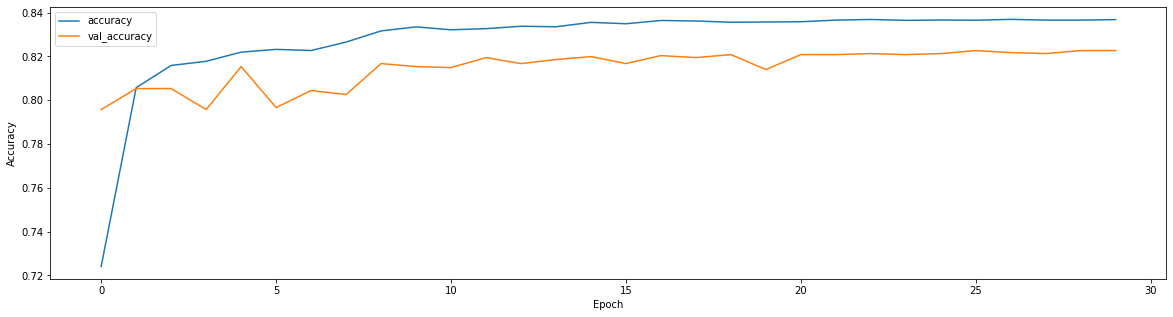

In [ ]:
plt.plot(ann_model.history.history['accuracy'])
# plt.plot(ann_model.history.history['Precision'])
plt.plot(ann_model.history.history['val_accuracy'])
# plt.plot(ann_model.history.history['val_Precision'])
plt.legend(("accuracy","val_accuracy"))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

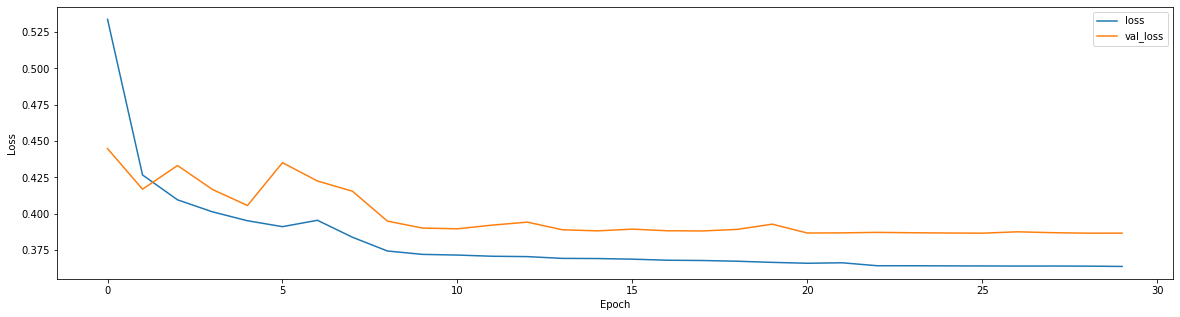

In [ ]:
plt.plot(ann_model.history.history['loss'])
plt.plot(ann_model.history.history['val_loss'])
plt.legend(("loss","val_loss"))
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
# plt.plot(ann_model.history.history['Recall'])
# plt.plot(ann_model.history.history['Precision'])
# plt.plot(ann_model.history.history['AUC'])
# plt.legend(("Recall","Precision","AUC"))
# plt.xlabel('Epoch')

In [ ]:
y1_pred=ann_model.predict(test_signal)
predict_1=[int(x+0.5) for x in y1_pred]
vot.append(np.array(predict_1))
conf_mat=confusion_matrix(test_bclass,predict_1)
print(conf_mat)

[[1239    0]
 [ 964    0]]


In [ ]:
accuracy_score(test_bclass,predict_1)

0.8152519291874716

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_bclass, y1_pred)
metrics.auc(fpr, tpr)

0.8923790769560516

**CNN MODEL**

**Lenet-5 model**

In [ ]:
lenet_5_model=Sequential()

lenet_5_model.add(Conv1D(filters=6, kernel_size=3, padding='same', input_shape=(1000,12)))
lenet_5_model.add(BatchNormalization())
lenet_5_model.add(Activation('relu'))
lenet_5_model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

lenet_5_model.add(Conv1D(filters=16, strides=1, kernel_size=5))
lenet_5_model.add(BatchNormalization())
lenet_5_model.add(Activation('relu'))
lenet_5_model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

lenet_5_model.add(GlobalAveragePooling1D())

lenet_5_model.add(Dense(64, activation='relu'))

lenet_5_model.add(Dense(32, activation='relu'))

lenet_5_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# lenet_5_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
#         name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
#                     tf.keras.metrics.AUC(
#         num_thresholds=200,
#         curve="ROC",
#         summation_method="interpolation",
#         name="AUC",
#         dtype=None,
#         thresholds=None,
#         multi_label=True,
#         label_weights=None,
#     )])

In [ ]:
lenet_5_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy','AUC'])

In [ ]:
# lenet_5_model.summary()

In [ ]:
# plot_model(lenet_5_model)

In [ ]:
from sklearn.model_selection import KFold
n_folds=3
batchsize = 32
kfold = KFold(n_splits=n_folds, shuffle=True)
model_history = [] 

fold_no = 1
for train, test in kfold.split(X_train, Y_train):
  print("Training on Fold: ",fold_no)
  results = lenet_5_model.fit(X_train, Y_train, batch_size=batchsize, epochs=30, verbose='auto', callbacks=[reduce_lr,early_stop], validation_split=0.15)
  score = lenet_5_model.evaluate(X_test, Y_test, verbose=0)
  print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
  y_pred2=lenet_5_model.predict(X_test)
  predict2=[int(x+0.5) for x in y_pred2]
  conf_mat = confusion_matrix(Y_test, predict2)
  print(conf_mat)
  acc_score=accuracy_score(Y_test,y_pred2)
  prec_score = precision_score(Y_test, y_pred2)
  rec_score = recall_score(Y_test, y_pred2)
  f_score = f1_score(Y_test, y_pred2)
  print("Accuracu(test)",acc_score, "Precision(test)= ", prec_score, " Recall(test)= ", rec_score, " F1 Score(test)= ", f_score)

  fpr, tpr, thresholds = metrics.roc_curve(Y_test,y_pred2)
  print("AUC(test)",metrics.auc(fpr, tpr))
  fold_no = fold_no + 1
  
  model_history.append(results)


Training on Fold:  1
Epoch 1/30
493/493 [==============================] - 26s 9ms/step - loss: 0.4809 - accuracy: 0.7668 - auc: 0.8472 - val_loss: 0.4194 - val_accuracy: 0.8162 - val_auc: 0.8963 - lr: 0.0010
Epoch 2/30
493/493 [==============================] - 3s 6ms/step - loss: 0.4106 - accuracy: 0.8077 - auc: 0.8904 - val_loss: 0.4003 - val_accuracy: 0.8205 - val_auc: 0.9088 - lr: 0.0010
Epoch 3/30
493/493 [==============================] - 3s 6ms/step - loss: 0.3910 - accuracy: 0.8201 - auc: 0.9012 - val_loss: 0.3796 - val_accuracy: 0.8330 - val_auc: 0.9120 - lr: 0.0010
Epoch 4/30
493/493 [==============================] - 3s 6ms/step - loss: 0.3762 - accuracy: 0.8271 - auc: 0.9084 - val_loss: 0.3759 - val_accuracy: 0.8320 - val_auc: 0.9137 - lr: 0.0010
Epoch 5/30
493/493 [==============================] - 3s 6ms/step - loss: 0.3712 - accuracy: 0.8330 - auc: 0.9116 - val_loss: 0.3698 - val_accuracy: 0.8373 - val_auc: 0.9156 - lr: 0.0010
Epoch 6/30
493/493 [=======================

Text(0, 0.5, 'Accuracy')

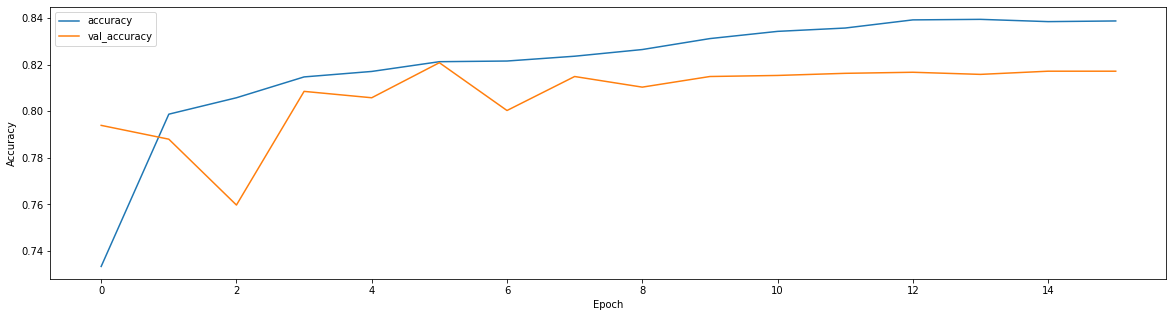

In [ ]:
plt.plot(lenet_5_model.history.history['accuracy'])
# plt.plot(lenet_5_model.history.history['Precision'])
plt.plot(lenet_5_model.history.history['val_accuracy'])
# plt.plot(lenet_5_model.history.history['val_Precision'])
plt.legend(("accuracy","val_accuracy"))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

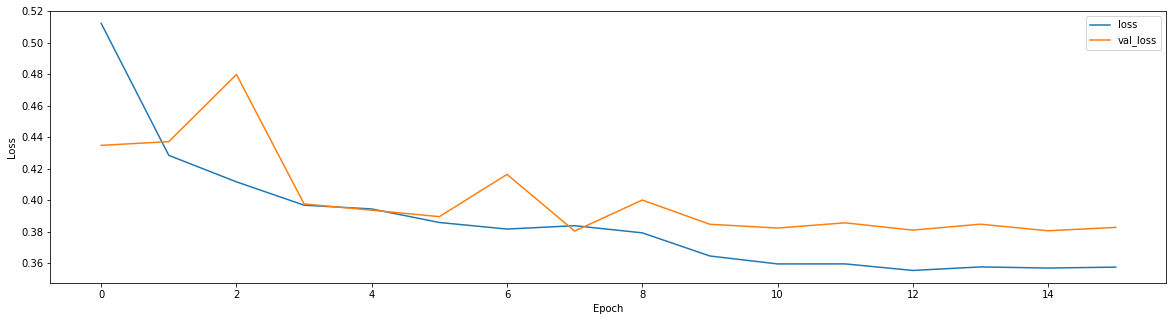

In [ ]:
plt.plot(lenet_5_model.history.history['loss'])
plt.plot(lenet_5_model.history.history['val_loss'])
plt.legend(("loss","val_loss"))
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
# plt.plot(lenet_5_model.history.history['Recall'])
# plt.plot(lenet_5_model.history.history['Precision'])
# plt.plot(lenet_5_model.history.history['AUC'])
# plt.legend(("Recall","Precision","AUC"))
# plt.xlabel('Epoch')

In [ ]:
y2_pred=lenet_5_model.predict(test_signal)
predict_2=[int (x+0.5) for x in y2_pred]
vot.append(np.array(predict_2))
conf_mat=confusion_matrix(test_bclass,predict_2)
print(conf_mat)

[[948 291]
 [120 844]]


In [ ]:
accuracy_score(test_bclass,predict_2)

0.8134362233318202

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_bclass, y2_pred)
metrics.auc(fpr, tpr)

0.9065410466880333

**AlexNet model**

In [ ]:
alexNet_model=Sequential()

alexNet_model.add(Conv1D(filters=96, kernel_size=11, strides=4, input_shape=(1000,12)))
alexNet_model.add(BatchNormalization())
alexNet_model.add(Activation('relu'))
alexNet_model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

alexNet_model.add(Conv1D(filters=256, kernel_size=5, padding='same'))
alexNet_model.add(BatchNormalization())
alexNet_model.add(Activation('relu'))
alexNet_model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

alexNet_model.add(Conv1D(filters=384, padding='same', kernel_size=3))
alexNet_model.add(BatchNormalization())
alexNet_model.add(Activation('relu'))
alexNet_model.add(Conv1D(filters=384, kernel_size=3))
alexNet_model.add(BatchNormalization())
alexNet_model.add(Activation('relu'))
alexNet_model.add(Conv1D(filters=256, kernel_size=3))
alexNet_model.add(BatchNormalization())
alexNet_model.add(Activation('relu'))
alexNet_model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

alexNet_model.add(GlobalAveragePooling1D())
alexNet_model.add(Dense(128, activation='relu'))
alexNet_model.add(Dropout(0.4))
alexNet_model.add(Dense(128, activation='relu'))
alexNet_model.add(Dropout(0.4))
alexNet_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# alexNet_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
#         name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
#                     tf.keras.metrics.AUC(
#         num_thresholds=200,
#         curve="ROC",
#         summation_method="interpolation",
#         name="AUC",
#         dtype=None,
#         thresholds=None,
#         multi_label=True,
#         label_weights=None,
#     )])

In [ ]:
alexNet_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy','AUC'])

In [ ]:
alexNet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 248, 96)           12768     
                                                                 
 batch_normalization_2 (Batc  (None, 248, 96)          384       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 248, 96)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 124, 96)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 124, 256)          123136    
                                                                 
 batch_normalization_3 (Batc  (None, 124, 256)        

In [ ]:
# plot_model(alexNet_model)

In [ ]:
from sklearn.model_selection import KFold
n_folds=2
batchsize = 32
kfold = KFold(n_splits=n_folds, shuffle=True)
model_history = [] 

fold_no = 1
for train, test in kfold.split(X_train, Y_train):
  print("Training on Fold: ",fold_no)
  results = alexNet_model.fit(X_train, Y_train, batch_size=batchsize, epochs=30, verbose='auto', callbacks=[reduce_lr,early_stop], validation_split=0.15)
  score = alexNet_model.evaluate(X_test, Y_test, verbose=0)
  print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
  y_pred3=alexNet_model.predict(X_test)
  predict3=[int(x+0.5) for x in y_pred3]
  conf_mat = confusion_matrix(Y_test, predict3)
  print(conf_mat)
  acc_score=accuracy_score(Y_test,predict3)
  prec_score = precision_score(Y_test, predict3)
  rec_score = recall_score(Y_test, predict3)
  f_score = f1_score(Y_test, predict3)
  print("Accuracu(test)",acc_score, "Precision(test)= ", prec_score, " Recall(test)= ", rec_score, " F1 Score(test)= ", f_score)
  fold_no = fold_no + 1
  
  model_history.append(results)


In [ ]:
# batchsize = 32
# alexNet_model.fit(x=signal, y=target, batch_size=batchsize, epochs=30, verbose='auto', callbacks=[reduce_lr,early_stop],  validation_data=(v_signal,v_target))

Epoch 1/30
546/546 [==============================] - 13s 18ms/step - loss: 0.3864 - accuracy: 0.8289 - auc: 0.9052 - val_loss: 0.3557 - val_accuracy: 0.8495 - val_auc: 0.9295 - lr: 0.0010
Epoch 2/30
546/546 [==============================] - 8s 15ms/step - loss: 0.3287 - accuracy: 0.8556 - auc: 0.9320 - val_loss: 0.3638 - val_accuracy: 0.8363 - val_auc: 0.9346 - lr: 0.0010
Epoch 3/30
546/546 [==============================] - 8s 16ms/step - loss: 0.3144 - accuracy: 0.8669 - auc: 0.9378 - val_loss: 0.3114 - val_accuracy: 0.8614 - val_auc: 0.9394 - lr: 0.0010
Epoch 4/30
546/546 [==============================] - 9s 16ms/step - loss: 0.3020 - accuracy: 0.8739 - auc: 0.9426 - val_loss: 0.3308 - val_accuracy: 0.8518 - val_auc: 0.9347 - lr: 0.0010
Epoch 5/30
546/546 [==============================] - 8s 15ms/step - loss: 0.2957 - accuracy: 0.8748 - auc: 0.9449 - val_loss: 0.3299 - val_accuracy: 0.8573 - val_auc: 0.9392 - lr: 0.0010
Epoch 6/30
546/546 [==============================] - 8s 15

Text(0, 0.5, 'Accuracy')

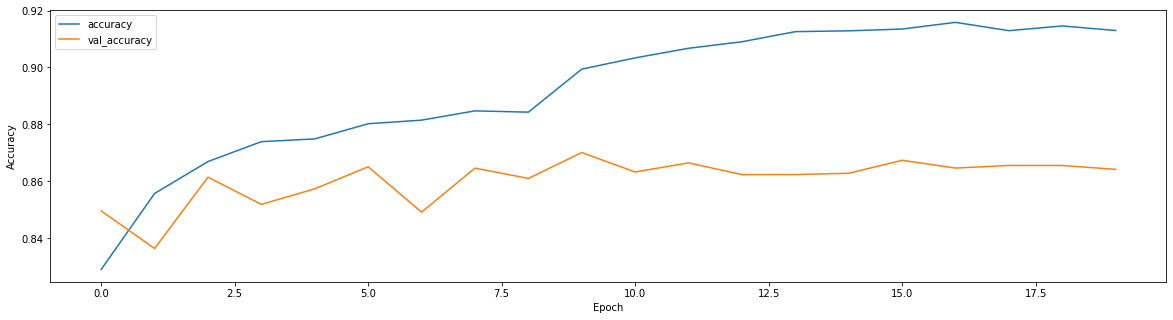

In [ ]:
plt.plot(alexNet_model.history.history['accuracy'])
# plt.plot(alexNet_model.history.history['Precision'])
plt.plot(alexNet_model.history.history['val_accuracy'])
# plt.plot(alexNet_model.history.history['val_Precision'])
plt.legend(("accuracy","val_accuracy"))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

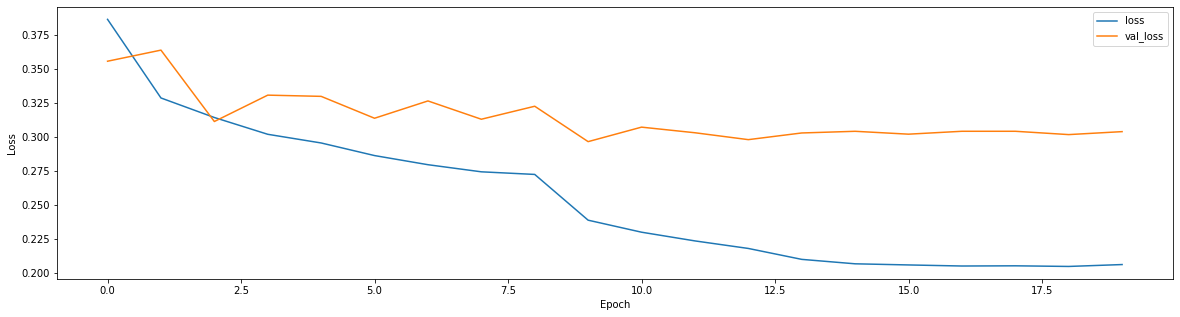

In [ ]:
plt.plot(alexNet_model.history.history['loss'])
plt.plot(alexNet_model.history.history['val_loss'])
plt.legend(("loss","val_loss"))
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
# plt.plot(alexNet_model.history.history['Recall'])
# plt.plot(alexNet_model.history.history['Precision'])
# plt.plot(alexNet_model.history.history['AUC'])
# plt.legend(("Recall","Precision","AUC"))
# plt.xlabel('Epoch')

In [ ]:
y3_pred=alexNet_model.predict(test_signal)
predict_3=[int(x+0.5) for x in y3_pred]
vot.append(np.array(predict_3))
conf_mat=confusion_matrix(test_bclass,predict_3)
print(conf_mat)

[[1035  204]
 [  97  867]]


In [ ]:
accuracy_score(test_bclass,predict_3)

0.8633681343622334

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_bclass, y3_pred)
metrics.auc(fpr, tpr)

0.9419673207211009

**VGG 16**

In [ ]:
vgg_16_model=Sequential()

vgg_16_model.add(Conv1D(filters=64, kernel_size=3, padding='same',  input_shape=(1000,12)))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv1D(filters=64, kernel_size=3, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

vgg_16_model.add(Conv1D(filters=128, kernel_size=3, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv1D(filters=128, kernel_size=3, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

vgg_16_model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv1D(filters=256, kernel_size=3, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

vgg_16_model.add(Conv1D(filters=512, kernel_size=3, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv1D(filters=512, kernel_size=3, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv1D(filters=512, kernel_size=3, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

vgg_16_model.add(Conv1D(filters=512, kernel_size=3, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv1D(filters=512, kernel_size=1, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(Conv1D(filters=512, kernel_size=1, padding='same'))
vgg_16_model.add(BatchNormalization())
vgg_16_model.add(Activation('relu'))
vgg_16_model.add(MaxPool1D(pool_size=2, strides=2, padding='same'))

vgg_16_model.add(GlobalAveragePooling1D())
vgg_16_model.add(Dense(256, activation='relu'))
vgg_16_model.add(Dropout(0.4))
vgg_16_model.add(Dense(128, activation='relu'))
vgg_16_model.add(Dropout(0.4))
vgg_16_model.add(Dense(1, activation='sigmoid'))

In [ ]:
#  vgg_16_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
#         name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
#                     tf.keras.metrics.AUC(
#         num_thresholds=200,
#         curve="ROC",
#         summation_method="interpolation",
#         name="AUC",
#         dtype=None,
#         thresholds=None,
#         multi_label=True,
#         label_weights=None,
#     )])

In [ ]:
vgg_16_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy','AUC'])

In [ ]:
# vgg_16_model.summary()

In [ ]:
# plot_model(vgg_16_model)

In [ ]:
from sklearn.model_selection import KFold
n_folds=5
batchsize = 32
kfold = KFold(n_splits=n_folds, shuffle=True)
model_history = [] 

fold_no = 1
for train, test in kfold.split(X_train, Y_train):
  print("Training on Fold: ",fold_no)
  results = vgg_16_model.fit(X_train, Y_train, batch_size=batchsize, epochs=30, verbose='auto', callbacks=[reduce_lr,early_stop], validation_split=0.15)
  score = vgg_16_model.evaluate(X_test, Y_test, verbose=0)
  print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
  y_pred1=vgg_16_model.predict(X_test)
  predict1=[int(x+0.5) for x in y_pred1]
  conf_mat = confusion_matrix(Y_test, predict1)
  print(conf_mat)
  # acc_score=accuracy_score(Y_test,y_pred1)
  prec_score = precision_score(Y_test, predict1)
  rec_score = recall_score(Y_test, predict1)
  f_score = f1_score(Y_test, predict1)
  print("Precision(test)= ", prec_score, " Recall(test)= ", rec_score, " F1 Score(test)= ", f_score)
  fpr, tpr, thresholds = metrics.roc_curve(Y_test,y_pred1)
  print("AUC(test)= ",metrics.auc(fpr, tpr))
  
  fold_no = fold_no + 1
  
  model_history.append(results)

Training on Fold:  1
Epoch 1/30
493/493 [==============================] - 52s 68ms/step - loss: 0.4092 - accuracy: 0.8190 - auc: 0.8943 - val_loss: 0.5930 - val_accuracy: 0.8047 - val_auc: 0.9220 - lr: 0.0010
Epoch 2/30
493/493 [==============================] - 32s 64ms/step - loss: 0.3536 - accuracy: 0.8465 - auc: 0.9217 - val_loss: 0.3354 - val_accuracy: 0.8578 - val_auc: 0.9323 - lr: 0.0010
Epoch 3/30
493/493 [==============================] - 32s 65ms/step - loss: 0.3336 - accuracy: 0.8556 - auc: 0.9298 - val_loss: 0.3094 - val_accuracy: 0.8621 - val_auc: 0.9469 - lr: 0.0010
Epoch 4/30
493/493 [==============================] - 33s 67ms/step - loss: 0.3222 - accuracy: 0.8629 - auc: 0.9347 - val_loss: 0.2954 - val_accuracy: 0.8621 - val_auc: 0.9447 - lr: 0.0010
Epoch 5/30
493/493 [==============================] - 34s 69ms/step - loss: 0.3107 - accuracy: 0.8672 - auc: 0.9393 - val_loss: 0.3248 - val_accuracy: 0.8592 - val_auc: 0.9479 - lr: 0.0010
Epoch 6/30
493/493 [==============

In [ ]:
# batchsize = 32
# vgg_16_model.fit(x=signal, y=target, batch_size=batchsize, epochs=30, verbose='auto', callbacks=[reduce_lr,early_stop],  validation_data=(v_signal,v_target))

Epoch 1/30
546/546 [==============================] - 41s 67ms/step - loss: 0.3939 - accuracy: 0.8288 - auc: 0.9026 - val_loss: 0.8846 - val_accuracy: 0.7629 - val_auc: 0.9098 - lr: 0.0010
Epoch 2/30
546/546 [==============================] - 35s 65ms/step - loss: 0.3387 - accuracy: 0.8562 - auc: 0.9283 - val_loss: 0.3370 - val_accuracy: 0.8623 - val_auc: 0.9319 - lr: 0.0010
Epoch 3/30
546/546 [==============================] - 35s 64ms/step - loss: 0.3198 - accuracy: 0.8679 - auc: 0.9368 - val_loss: 0.4190 - val_accuracy: 0.8235 - val_auc: 0.9197 - lr: 0.0010
Epoch 4/30
546/546 [==============================] - 35s 64ms/step - loss: 0.3088 - accuracy: 0.8696 - auc: 0.9404 - val_loss: 0.3895 - val_accuracy: 0.8395 - val_auc: 0.9181 - lr: 0.0010
Epoch 5/30
546/546 [==============================] - 35s 64ms/step - loss: 0.2970 - accuracy: 0.8742 - auc: 0.9447 - val_loss: 0.3603 - val_accuracy: 0.8336 - val_auc: 0.9254 - lr: 0.0010
Epoch 6/30
546/546 [==============================] - 3

Text(0, 0.5, 'Accuracy')

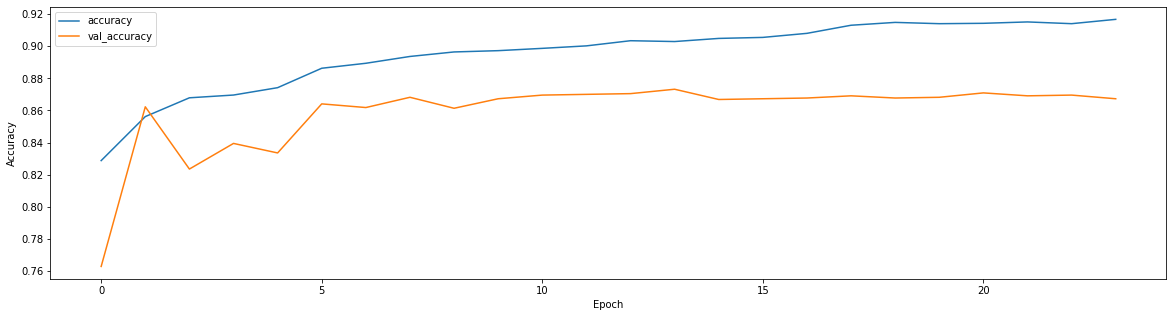

In [ ]:
plt.plot(vgg_16_model.history.history['accuracy'])
# plt.plot(vgg_16_model.history.history['Precision'])
plt.plot(vgg_16_model.history.history['val_accuracy'])
# plt.plot(vgg_16_model.history.history['val_Precision'])
plt.legend(("accuracy","val_accuracy"))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

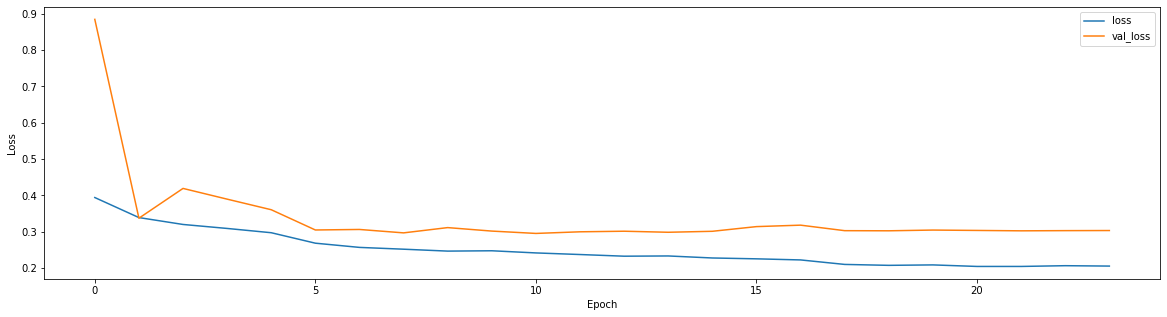

In [ ]:
plt.plot(vgg_16_model.history.history['loss'])
plt.plot(vgg_16_model.history.history['val_loss'])
plt.legend(("loss","val_loss"))
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
# plt.plot(vgg_16_model.history.history['Recall'])
# plt.plot(vgg_16_model.history.history['Precision'])
# plt.plot(vgg_16_model.history.history['AUC'])
# plt.legend(("Recall","Precision","AUC"))
# plt.xlabel('Epoch')

In [ ]:
y4_pred=vgg_16_model.predict(test_signal)
predict_4=[int(x+0.5) for x in y4_pred]
vot.append(np.array(predict_4))
conf_mat=confusion_matrix(test_bclass,predict_4)
print(conf_mat)

[[1039  200]
 [  91  873]]


In [ ]:
accuracy_score(test_bclass,predict_4)

0.8679073990013618

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_bclass, y4_pred)
metrics.auc(fpr, tpr)

0.9426747912752554

**Resnet 50 Model**

In [ ]:
def identity_block(X, f, filters):
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    X = Conv1D(filters = F1, kernel_size = 1, activation='relu', strides = 1, padding = 'valid')(X)
    X = BatchNormalization()(X)
    
    X = Conv1D(filters = F2, kernel_size = f, activation='relu', strides = 1, padding = 'same')(X)
    X = BatchNormalization()(X)

    X = Conv1D(filters = F3, kernel_size = 1, activation='relu', strides = 1, padding = 'valid')(X)
    X = BatchNormalization()(X)

    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X

def convolutional_block(X, f, filters, s = 2):
    F1, F2, F3 = filters
    
    X_shortcut = X

    X = Conv1D(F1, 1, activation='relu', strides = s)(X)
    X = BatchNormalization()(X)
    
    X = Conv1D(F2, f, activation='relu', strides = 1,padding = 'same')(X)
    X = BatchNormalization()(X)

    X = Conv1D(F3, 1, strides = 1)(X)
    X = BatchNormalization()(X)

    X_shortcut = Conv1D(F3, 1, strides = s)(X_shortcut)
    X_shortcut = BatchNormalization()(X_shortcut)
    
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    return X

def ResNet50(input_shape):
    
    X_input = Input(input_shape)

    X = ZeroPadding1D(3)(X_input)
    
    X = Conv1D(64, 7, strides = 2)(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPool1D(pool_size=2, strides=2, padding='same')(X)

    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    X = convolutional_block(X, f = 3, filters = [128,128,512], s = 2)
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512])

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])

    X = MaxPool1D(pool_size=2, strides=2, padding='same')(X)
    
    X = GlobalAveragePooling1D()(X)
    X = Dense(1,activation='sigmoid')(X)
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
resNet50_model = ResNet50(input_shape = (1000,12))

In [ ]:
# resNet50_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
#         name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
#                     tf.keras.metrics.AUC(
#         num_thresholds=200,
#         curve="ROC",
#         summation_method="interpolation",
#         name="AUC",
#         dtype=None,
#         thresholds=None,
#         multi_label=True,
#         label_weights=None,
#     )])

In [ ]:
resNet50_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy','AUC'])

In [ ]:
# resNet50_model.summary()

In [ ]:
# plot_model(resNet50_model)

In [ ]:
batchsize = 32
resNet50_model.fit(x=signal, y=target, batch_size=batchsize, epochs=30, verbose='auto', callbacks=[reduce_lr,early_stop],  validation_data=(v_signal,v_target))

Epoch 1/30
546/546 [==============================] - 90s 137ms/step - loss: 0.6296 - accuracy: 0.7227 - auc: 0.7900 - val_loss: 0.6782 - val_accuracy: 0.7114 - val_auc: 0.8311 - lr: 0.0010
Epoch 2/30
546/546 [==============================] - 71s 130ms/step - loss: 0.4304 - accuracy: 0.8056 - auc: 0.8862 - val_loss: 0.5344 - val_accuracy: 0.7957 - val_auc: 0.9064 - lr: 0.0010
Epoch 3/30
546/546 [==============================] - 71s 130ms/step - loss: 0.3775 - accuracy: 0.8337 - auc: 0.9132 - val_loss: 0.3866 - val_accuracy: 0.8363 - val_auc: 0.9247 - lr: 0.0010
Epoch 4/30
546/546 [==============================] - 71s 131ms/step - loss: 0.3360 - accuracy: 0.8526 - auc: 0.9289 - val_loss: 0.4541 - val_accuracy: 0.8299 - val_auc: 0.9238 - lr: 0.0010
Epoch 5/30
546/546 [==============================] - 71s 130ms/step - loss: 0.3626 - accuracy: 0.8429 - auc: 0.9212 - val_loss: 0.3592 - val_accuracy: 0.8404 - val_auc: 0.9249 - lr: 0.0010
Epoch 6/30
546/546 [==============================

Text(0, 0.5, 'Accuracy')

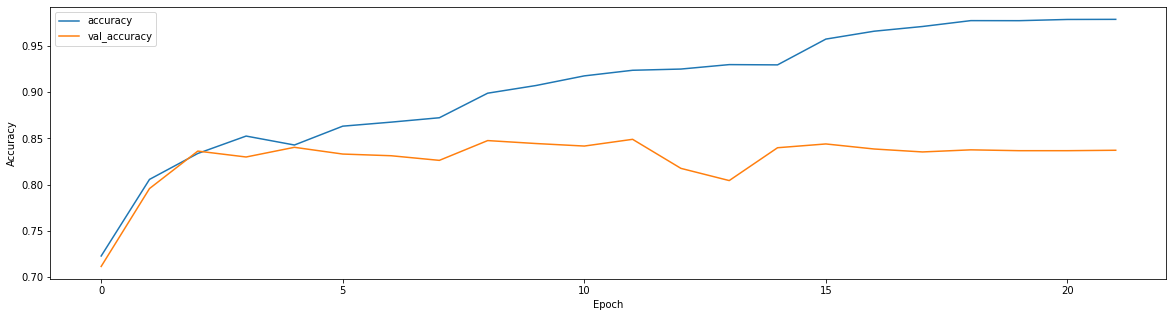

In [ ]:
plt.plot(resNet50_model.history.history['accuracy'])
# plt.plot(resNet50_model.history.history['Precision'])
plt.plot(resNet50_model.history.history['val_accuracy'])
# plt.plot(resNet50_model.history.history['val_Precision'])
plt.legend(("accuracy","val_accuracy"))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

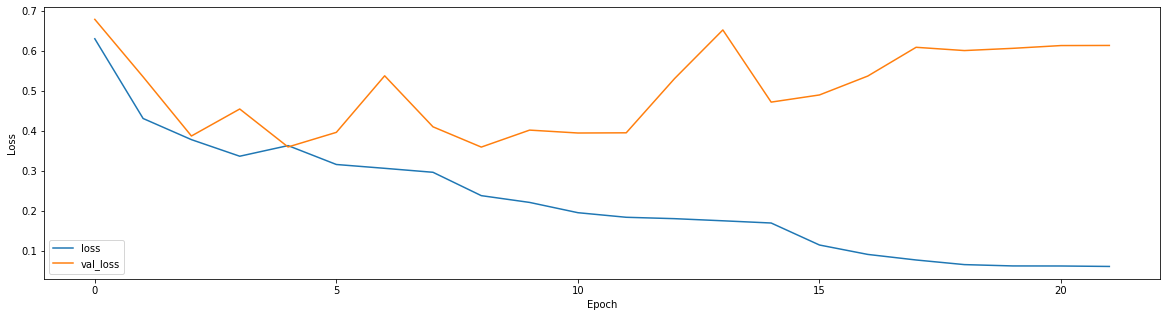

In [ ]:
plt.plot(resNet50_model.history.history['loss'])
plt.plot(resNet50_model.history.history['val_loss'])
plt.legend(("loss","val_loss"))
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
# plt.plot(resNet50_model.history.history['Recall'])
# plt.plot(resNet50_model.history.history['Precision'])
# plt.plot(resNet50_model.history.history['AUC'])
# plt.legend(("Recall","Precision","AUC"))
# plt.xlabel('Epoch')

In [ ]:
y5_pred=resNet50_model.predict(test_signal)
predict_5=[int(x+0.5) for x in y5_pred]
vot.append(np.array(predict_5))
conf_mat=confusion_matrix(test_bclass,predict_5)
print(conf_mat)

[[998 241]
 [110 854]]


In [ ]:
accuracy_score(test_bclass,predict_5)

0.8406718111665911

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_bclass, y5_pred)
metrics.auc(fpr, tpr)

0.9183712939427123

**Inseption Model**

In [ ]:
def inception_block(prev_layer):
    
    conv1=Conv1D(filters = 64, kernel_size = 1, padding = 'same')(prev_layer)
    conv1=BatchNormalization()(conv1)
    conv1=Activation('relu')(conv1)
    
    conv3=Conv1D(filters = 64, kernel_size = 1, padding = 'same')(prev_layer)
    conv3=BatchNormalization()(conv3)
    conv3=Activation('relu')(conv3)
    conv3=Conv1D(filters = 64, kernel_size = 3, padding = 'same')(conv3)
    conv3=BatchNormalization()(conv3)
    conv3=Activation('relu')(conv3)
    
    conv5=Conv1D(filters = 64, kernel_size = 1, padding = 'same')(prev_layer)
    conv5=BatchNormalization()(conv5)
    conv5=Activation('relu')(conv5)
    conv5=Conv1D(filters = 64, kernel_size = 5, padding = 'same')(conv5)
    conv5=BatchNormalization()(conv5)
    conv5=Activation('relu')(conv5)
    
    pool= MaxPool1D(pool_size=3, strides=1, padding='same')(prev_layer)
    convmax=Conv1D(filters = 64, kernel_size = 1, padding = 'same')(pool)
    convmax=BatchNormalization()(convmax)
    convmax=Activation('relu')(convmax)
    
    layer_out = concatenate([conv1, conv3, conv5, convmax], axis=1)
    
    return layer_out

def inception_model(input_shape):
    X_input=Input(input_shape)
    
    X = ZeroPadding1D(3)(X_input)
    
    X = Conv1D(filters = 64, kernel_size = 7, padding = 'same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = MaxPool1D(pool_size=3, strides=2, padding='same')(X)
    
    X = Conv1D(filters = 64, kernel_size = 1, padding = 'same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = inception_block(X)
    X = inception_block(X)
    
    X = MaxPool1D(pool_size=7, strides=2, padding='same')(X)
    
    X = GlobalAveragePooling1D()(X)
    X = Dense(1,activation='sigmoid')(X)
    
    model = Model(inputs = X_input, outputs = X, name='Inception')
    
    return model

In [ ]:
inception_model = inception_model(input_shape = (1000,12))

In [ ]:
# inception_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
#         name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
#                     tf.keras.metrics.AUC(
#         num_thresholds=200,
#         curve="ROC",
#         summation_method="interpolation",
#         name="AUC",
#         dtype=None,
#         thresholds=None,
#         multi_label=True,
#         label_weights=None,
#     )])

In [ ]:
inception_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy','AUC'])

In [ ]:
# inception_model.summary()

In [ ]:
# plot_model(inception_model)

In [ ]:
batchsize = 32
inception_model.fit(x=signal, y=target, batch_size=batchsize, epochs=30, verbose='auto', callbacks=[reduce_lr,early_stop],  validation_data=(v_signal,v_target))

Epoch 1/30
546/546 [==============================] - 38s 63ms/step - loss: 0.3671 - accuracy: 0.8331 - auc: 0.9140 - val_loss: 0.3392 - val_accuracy: 0.8523 - val_auc: 0.9242 - lr: 0.0010
Epoch 2/30
546/546 [==============================] - 33s 61ms/step - loss: 0.3215 - accuracy: 0.8594 - auc: 0.9348 - val_loss: 0.3460 - val_accuracy: 0.8418 - val_auc: 0.9277 - lr: 0.0010
Epoch 3/30
546/546 [==============================] - 33s 60ms/step - loss: 0.3035 - accuracy: 0.8696 - auc: 0.9421 - val_loss: 0.3196 - val_accuracy: 0.8573 - val_auc: 0.9366 - lr: 0.0010
Epoch 4/30
546/546 [==============================] - 33s 61ms/step - loss: 0.2920 - accuracy: 0.8745 - auc: 0.9462 - val_loss: 0.3285 - val_accuracy: 0.8532 - val_auc: 0.9346 - lr: 0.0010
Epoch 5/30
546/546 [==============================] - 33s 61ms/step - loss: 0.2827 - accuracy: 0.8775 - auc: 0.9495 - val_loss: 0.3090 - val_accuracy: 0.8632 - val_auc: 0.9392 - lr: 0.0010
Epoch 6/30
546/546 [==============================] - 3

Text(0, 0.5, 'Accuracy')

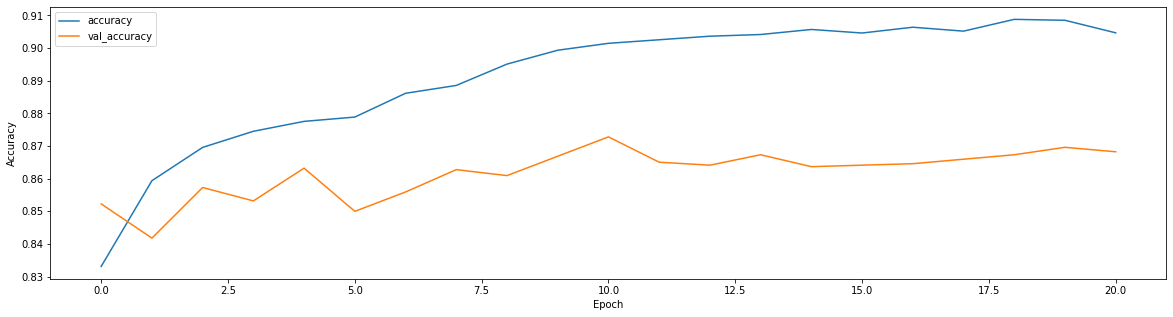

In [ ]:
plt.plot(inception_model.history.history['accuracy'])
# plt.plot(inception_model.history.history['Precision'])
plt.plot(inception_model.history.history['val_accuracy'])
# plt.plot(inception_model.history.history['val_Precision'])
plt.legend(("accuracy","val_accuracy"))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

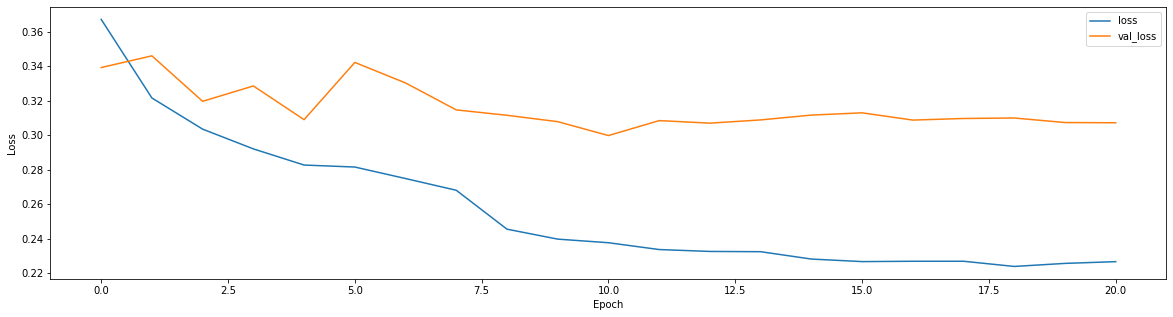

In [ ]:
plt.plot(inception_model.history.history['loss'])
plt.plot(inception_model.history.history['val_loss'])
plt.legend(("loss","val_loss"))
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
# plt.plot(inception_model.history.history['Recall'])
# plt.plot(inception_model.history.history['Precision'])
# plt.plot(inception_model.history.history['AUC'])
# plt.legend(("Recall","Precision","AUC"))
# plt.xlabel('Epoch')

In [ ]:
y6_pred=inception_model.predict(test_signal)
predict_6=[int(x+0.5) for x in y6_pred]
vot.append(np.array(predict_6))
conf_mat=confusion_matrix(test_bclass,predict_6)
print(conf_mat)

[[1024  215]
 [  74  890]]


In [ ]:
accuracy_score(test_bclass,predict_6)

0.8688152519291875

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_bclass, y6_pred)
metrics.auc(fpr, tpr)

0.9446682674757786

**RNN Models**

**LSTM Model**

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1000,12), return_sequences=True))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(32, activation = 'relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#  lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
#         name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
#                     tf.keras.metrics.AUC(
#         num_thresholds=200,
#         curve="ROC",
#         summation_method="interpolation",
#         name="AUC",
#         dtype=None,
#         thresholds=None,
#         multi_label=True,
#         label_weights=None,
#     )])

In [ ]:
# lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy','AUC'])

In [ ]:
# lstm_model.summary()

In [ ]:
# plot_model(lstm_model)

In [ ]:
# batchsize = 32
# lstm_model.fit(x=signal, y=target, batch_size=batchsize, epochs=30, verbose='auto', callbacks=[reduce_lr,early_stop],  validation_data=(v_signal,v_target))

Epoch 1/30
546/546 [==============================] - 39s 63ms/step - loss: 0.6859 - accuracy: 0.5534 - auc: 0.5286 - val_loss: 0.6798 - val_accuracy: 0.5636 - val_auc: 0.5454 - lr: 0.0010
Epoch 2/30
546/546 [==============================] - 34s 62ms/step - loss: 0.6810 - accuracy: 0.5625 - auc: 0.5393 - val_loss: 0.6600 - val_accuracy: 0.5983 - val_auc: 0.6403 - lr: 0.0010
Epoch 3/30
546/546 [==============================] - 34s 61ms/step - loss: 0.6871 - accuracy: 0.5610 - auc: 0.5281 - val_loss: 0.6842 - val_accuracy: 0.5636 - val_auc: 0.5419 - lr: 0.0010
Epoch 4/30
546/546 [==============================] - 33s 61ms/step - loss: 0.6839 - accuracy: 0.5633 - auc: 0.5151 - val_loss: 0.6819 - val_accuracy: 0.5636 - val_auc: 0.5296 - lr: 0.0010
Epoch 5/30
546/546 [==============================] - 35s 63ms/step - loss: 0.6824 - accuracy: 0.5641 - auc: 0.5213 - val_loss: 0.6701 - val_accuracy: 0.5641 - val_auc: 0.5711 - lr: 0.0010
Epoch 6/30
546/546 [==============================] - 3

Text(0, 0.5, 'Accuracy')

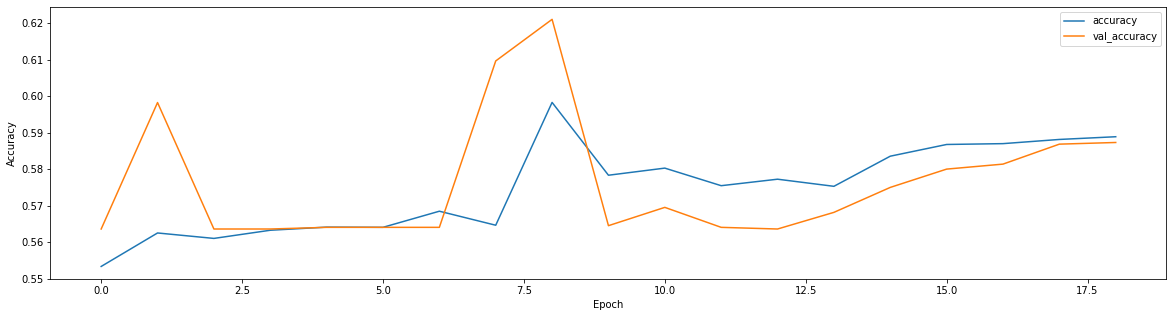

In [ ]:
# plt.plot(lstm_model.history.history['accuracy'])
# # plt.plot(lstm_model.history.history['Precision'])
# plt.plot(lstm_model.history.history['val_accuracy'])
# # plt.plot(lstm_model.history.history['val_Precision'])
# plt.legend(("accuracy","val_accuracy"))
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

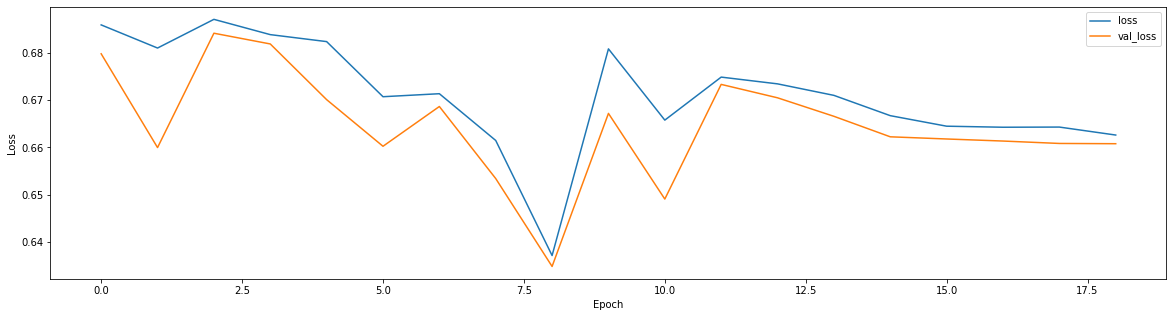

In [ ]:
# plt.plot(lstm_model.history.history['loss'])
# plt.plot(lstm_model.history.history['val_loss'])
# plt.legend(("loss","val_loss"))
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

In [ ]:
# plt.plot(lstm_model.history.history['Recall'])
# plt.plot(lstm_model.history.history['Precision'])
# plt.plot(lstm_model.history.history['AUC'])
# plt.legend(("Recall","Precision","AUC"))
# plt.xlabel('Epoch')

In [ ]:
#ann_model = Sequential()
#ann_model.add(Dense(50, activation='relu'))
#ann_model.add(Dense(50, activation='relu'))
#ann_model.add(Dense(50, activation='relu'))
#ann_model.add(GlobalAveragePooling1D())
#ann_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# y7_pred=lstm_model.predict(test_signal)
# predict_7=[int(x+0.5) for x in y7_pred]
# vot.append(np.array(predict_7))
# conf_mat=confusion_matrix(test_bclass,predict_7)
# print(conf_mat)

[[1103  136]
 [ 766  198]]


In [ ]:
# accuracy_score(test_bclass,predict_7)

0.5905583295506128

In [ ]:
# from sklearn import metrics
# fpr, tpr, thresholds = metrics.roc_curve(test_bclass, y7_pred)
# metrics.auc(fpr, tpr)

0.6574055003533168

**CNN+LSTM**

In [ ]:
# convlstm_model = Sequential()
# convlstm_model.add(Input((10,100,12)))
# convlstm_model.add(ConvLSTM1D(64, kernel_size=2, strides=1, padding = 'same',return_sequences=True))
# convlstm_model.add(BatchNormalization())

# convlstm_model.add(ConvLSTM1D(64,padding = 'same', kernel_size=3))
# convlstm_model.add(Dense(32, activation = 'relu'))
# convlstm_model.add(Dropout(0.3))
# convlstm_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# convlstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
#         name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
#                     tf.keras.metrics.AUC(
#         num_thresholds=200,
#         curve="ROC",
#         summation_method="interpolation",
#         name="AUC",
#         dtype=None,
#         thresholds=None,
#         multi_label=True,
#         label_weights=None,
#     )])

In [ ]:
# convlstm_model.summary()

In [ ]:
# plot_model(convlstm_model)

In [ ]:
# batchsize = 32
# convlstm_model.fit(x=newsignal, y=target, batch_size=batchsize, epochs=50, verbose='auto', callbacks=None, validation_split=0.2, validation_data=(newv_signal,v_target), shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None)

In [ ]:
# plt.plot(convlstm_model.history.history['accuracy'])
# plt.plot(convlstm_model.history.history['Precision'])
# plt.plot(convlstm_model.history.history['val_accuracy'])
# plt.plot(convlstm_model.history.history['val_Precision'])
# plt.legend(("accuracy","precision","val_accuracy","val_Precision"))
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

In [ ]:
# plt.plot(convlstm_model.history.history['loss'])
# plt.plot(convlstm_model.history.history['val_loss'])
# plt.legend(("loss","val_loss"))
# plt.xlabel('Epoch')
# plt.ylabel('Loss')

In [ ]:
# plt.plot(convlstm_model.history.history['Recall'])
# plt.plot(convlstm_model.history.history['Precision'])
# plt.plot(convlstm_model.history.history['AUC'])
# plt.legend(("Recall","Precision","AUC"))
# plt.xlabel('Epoch')

In [ ]:
input_layer = Input(shape=(1000,12))
conv1 = Conv1D(filters=32,
kernel_size=8,
strides=1,
activation='relu')(input_layer)
pool1 = MaxPool1D(pool_size=4)(conv1)
lstm1 = LSTM(64)(pool1)
output_layer = Dense(1, activation='sigmoid')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.BinaryAccuracy(
#         name='accuracy', dtype=None, threshold=0.5),tf.keras.metrics.Recall(name='Recall'),tf.keras.metrics.Precision(name='Precision'), 
#                     tf.keras.metrics.AUC(
#         num_thresholds=200,
#         curve="ROC",
#         summation_method="interpolation",
#         name="AUC",
#         dtype=None,
#         thresholds=None,
#         multi_label=True,
#         label_weights=None,
#     )])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy','AUC'])

In [ ]:
# model.summary()

In [ ]:
# plot_model(model)

In [ ]:
#tf.config.run_functions_eagerly(True)

In [ ]:
batchsize = 32
model.fit(x=signal, y=target, batch_size=batchsize, epochs=30, verbose='auto', callbacks=[reduce_lr,early_stop],  validation_data=(v_signal,v_target))

Epoch 1/30
546/546 [==============================] - 10s 15ms/step - loss: 0.5690 - accuracy: 0.6907 - auc: 0.7630 - val_loss: 0.4652 - val_accuracy: 0.7747 - val_auc: 0.8551 - lr: 0.0010
Epoch 2/30
546/546 [==============================] - 7s 13ms/step - loss: 0.4185 - accuracy: 0.8114 - auc: 0.8860 - val_loss: 0.4362 - val_accuracy: 0.7898 - val_auc: 0.8928 - lr: 0.0010
Epoch 3/30
546/546 [==============================] - 7s 13ms/step - loss: 0.3872 - accuracy: 0.8294 - auc: 0.9023 - val_loss: 0.4069 - val_accuracy: 0.8226 - val_auc: 0.9085 - lr: 0.0010
Epoch 4/30
546/546 [==============================] - 7s 13ms/step - loss: 0.3521 - accuracy: 0.8500 - auc: 0.9197 - val_loss: 0.3576 - val_accuracy: 0.8363 - val_auc: 0.9183 - lr: 0.0010
Epoch 5/30
546/546 [==============================] - 7s 13ms/step - loss: 0.4818 - accuracy: 0.7579 - auc: 0.8389 - val_loss: 0.4346 - val_accuracy: 0.7989 - val_auc: 0.8789 - lr: 0.0010
Epoch 6/30
546/546 [==============================] - 7s 13

Text(0, 0.5, 'Accuracy')

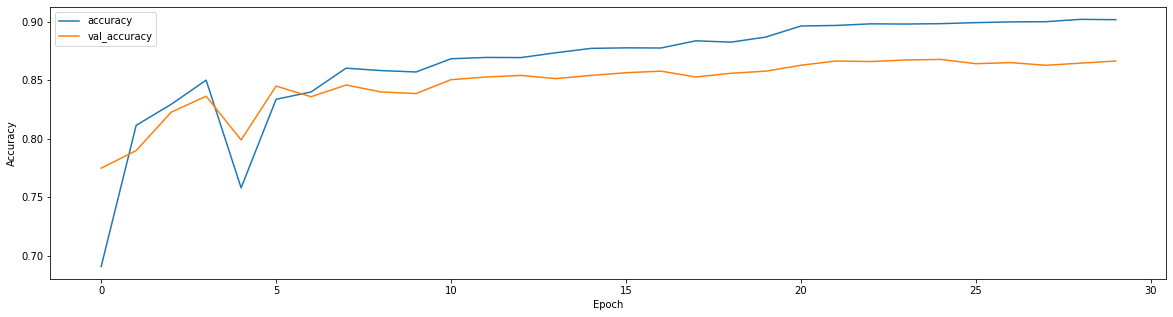

In [ ]:
plt.plot(model.history.history['accuracy'])
#plt.plot(model.history.history['Precision'])
plt.plot(model.history.history['val_accuracy'])
#plt.plot(model.history.history['val_Precision'])
plt.legend(("accuracy","val_accuracy"))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

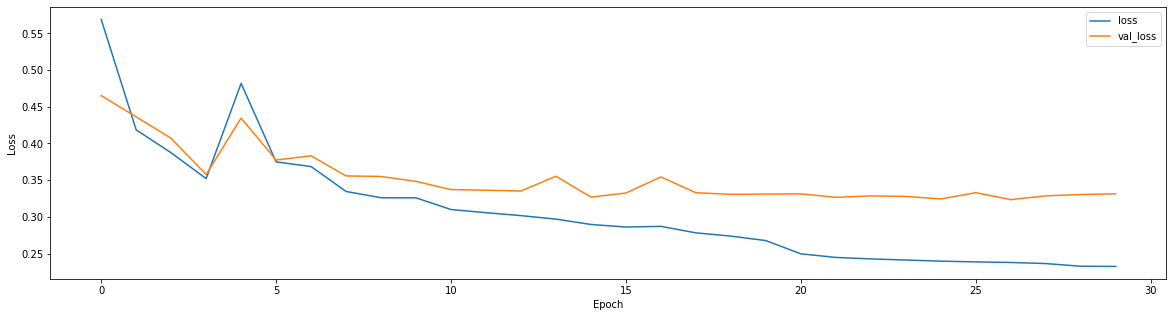

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(("loss","val_loss"))
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
y8_pred=model.predict(test_signal)
predict_8=[int(x+0.5) for x in y8_pred]
vot.append(np.array(predict_8))
conf_mat=confusion_matrix(test_bclass,predict_8)
print(conf_mat)

[[1004  235]
 [  90  874]]


In [ ]:
accuracy_score(test_bclass,predict_8)

0.8524738992283251

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_bclass, y8_pred)
metrics.auc(fpr, tpr)

0.9295945398343598

**TCNN**

In [ ]:
!pip install keras-tcn --no-dependencies

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tcn import TCN

In [ ]:
def tcn_model(kernel_size = 3, activation='relu'):
    
    inp = Input( shape=(1000,12))
    
    x = SpatialDropout1D(0.1)(inp)
    
    x = TCN(128,dilations = [1, 2, 4], return_sequences=True, activation = activation, name = 'tcn1')(x)
    x = TCN(64,dilations = [1, 2, 4], return_sequences=True, activation = activation, name = 'tcn2')(x)
    
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    
    conc = concatenate([avg_pool, max_pool])
    conc = Dense(16, activation="relu")(conc)
    conc = Dropout(0.1)(conc)
    outp = Dense(1, activation="sigmoid")(conc)    

    model = Model(inputs=inp, outputs=outp)
    model.compile( loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'])
    
    return model

In [ ]:
tcn_model = tcn_model ()

NameError: ignored

**Ensemble**

In [ ]:
y_prob = np.array(vot).transpose()

In [ ]:
y_prob.shape

(2203, 8)

In [ ]:
import collections

In [ ]:
final_out=[]
for i in range(0, y_prob.shape[0]):
  a=np.array(y_prob[i,:])
  a= collections.Counter(a).most_common()[0][0]
  final_out.append(a)

In [ ]:
accuracy_score(test_bclass,final_out)

0.8610985020426691

In [ ]:
classification_report(test_bclass,final_out)

'              precision    recall  f1-score   support\n\n           0       0.92      0.83      0.87      1239\n           1       0.80      0.90      0.85       964\n\n    accuracy                           0.86      2203\n   macro avg       0.86      0.87      0.86      2203\nweighted avg       0.87      0.86      0.86      2203\n'

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_bclass, final_out)
metrics.auc(fpr, tpr)

0.8656919480641261